In [1]:
!pip install pytrends

In [20]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
trending_topics = TrendReq(hl='en-US', tz=360)


In [21]:
kw_list=["Data Science"]
trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')


In [22]:
# Interest over time.
trending_topics.build_payload(kw_list=["Data Science"],
							cat=0, timeframe='today 12-m')
data = trending_topics.interest_over_time()
data = data.sort_values(by="Data Science", ascending = False)
data = data.head(10)
print(data)


            Data Science  isPartial
date                               
2023-03-26           100      False
2022-09-18            97      False
2022-09-11            97      False
2022-08-28            96      False
2022-08-21            95      False
2022-09-25            95      False
2023-06-11            93      False
2022-10-09            91      False
2023-01-29            90      False
2022-07-31            90      False


In [23]:
# Interest by Region
data = trending_topics.interest_by_region()
data = data.sort_values(by="Data Science",
						ascending = False)
data = data.head(10)
print(data)


           Data Science
geoName                
Zimbabwe            100
India                91
Ethiopia             78
Kenya                73
Nigeria              64
Singapore            62
Ghana                59
China                59
Sri Lanka            55
Pakistan             54


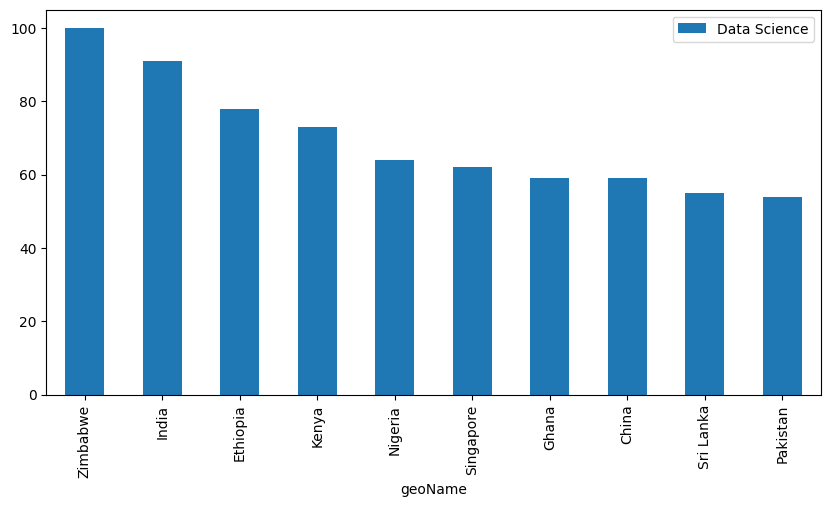

In [24]:
data.reset_index().plot(x='geoName', y='Data Science',
						figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()


In [26]:
# Top charts.
df = trending_topics.top_charts(2020, hl='en-US',
								tz=300, geo='GLOBAL')
df.head(10)


,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
5,India vs New Zealand,
6,Coronavirus update,
7,Coronavirus symptoms,
8,Joe Biden,
9,Google Classroom,


In [30]:
# Top charts.
df = trending_topics.top_charts(2021, hl='en-US',
								tz=300, geo='GLOBAL')
df.head(10)


,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,
5,Copa América,Copa America
6,India vs New Zealand,
7,T20 World Cup,
8,Squid Game,
9,DMX,


In [29]:
# Top charts.

df = trending_topics.top_charts(2022, hl='en-US',
								tz=300, geo='GLOBAL')
df.head(10)


,title,exploreQuery
0,Wordle,
1,India vs England,
2,Ukraine,
3,Queen Elizabeth,
4,Ind vs SA,
5,World Cup,
6,India vs West Indies,
7,iPhone 14,
8,Jeffrey Dahmer,
9,Indian Premier League,


In [31]:
trending_topics.build_payload(kw_list=['Data Science'])
related_queries = trending_topics.related_queries()
related_queries.values()


dict_values([{'top':                        query  value
0        data science course    100
1       what is data science     99
2               what is data     93
3            what is science     92
4        python data science     81
5                     python     77
6          data science jobs     74
7           computer science     70
8             data analytics     63
9       data science masters     53
10       data science salary     53
11            data scientist     52
12      data science courses     49
13          machine learning     48
14       data science master     44
15                     which     44
16  data science engineering     35
17          data science job     34
18   python for data science     32
19             data analysis     31
20   masters in data science     30
21                statistics     29
22       data science degree     29
23              data analyst     29
24                  big data     26, 'rising':                                 

In [32]:
keywords = trending_topics.suggestions(
keyword='Data Science')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')


,title,type
0,Data science,Field of study
1,The Soulmate Equation,Book by Christina Lauren
2,Finding the Mother Tree: Discovering the Wisdo...,Book by Suzanne Simard
3,Data Science Academy,Topic
4,Mathematics for Machine Learning,"Book by A. Aldo Faisal, Cheng Soon Ong, and Ma..."


In [37]:
# Create a DataFrame from the interest over time data
interest_over_time_df = data.reset_index()
interest_over_time_df.columns = ['Date', 'Interest']


In [38]:
# Create a DataFrame from the interest by region data
interest_by_region_df = data.reset_index()
interest_by_region_df.columns = ['Region', 'Interest']


In [40]:
# Create a DataFrame from the top charts data
top_charts_df = df.reset_index().rename(columns={'title': 'Top Chart'})

In [43]:
# Create a DataFrame from the related queries data
related_queries_df = pd.DataFrame(columns=['Related Query', 'Interest'])
for queries in related_queries.values():
    related_queries_df = related_queries_df.append(pd.DataFrame.from_dict(queries))
related_queries_df = related_queries_df.rename(columns={'query': 'Related Query', 'value': 'Interest'})


AttributeError: 'DataFrame' object has no attribute 'append'

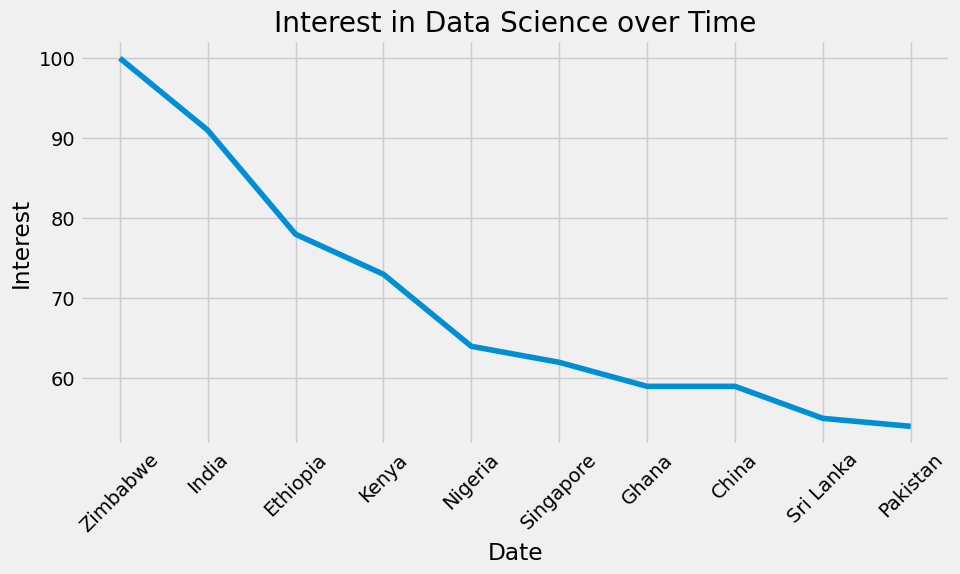

In [44]:
# Line plot for interest over time
plt.figure(figsize=(10, 5))
plt.plot(interest_over_time_df['Date'], interest_over_time_df['Interest'])
plt.xlabel('Date')
plt.ylabel('Interest')
plt.title('Interest in Data Science over Time')
plt.xticks(rotation=45)
plt.show()

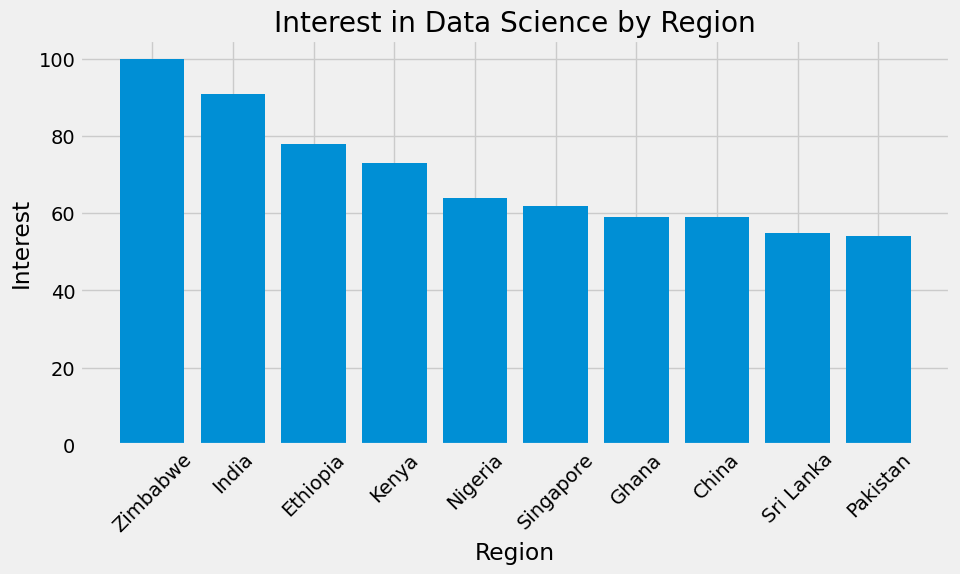

In [45]:
# Bar plot for interest by region
plt.figure(figsize=(10, 5))
plt.bar(interest_by_region_df['Region'], interest_by_region_df['Interest'])
plt.xlabel('Region')
plt.ylabel('Interest')
plt.title('Interest in Data Science by Region')
plt.xticks(rotation=45)
plt.show()

C:\Users\conta\AppData\Local\Temp\ipykernel_12148\3004257558.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


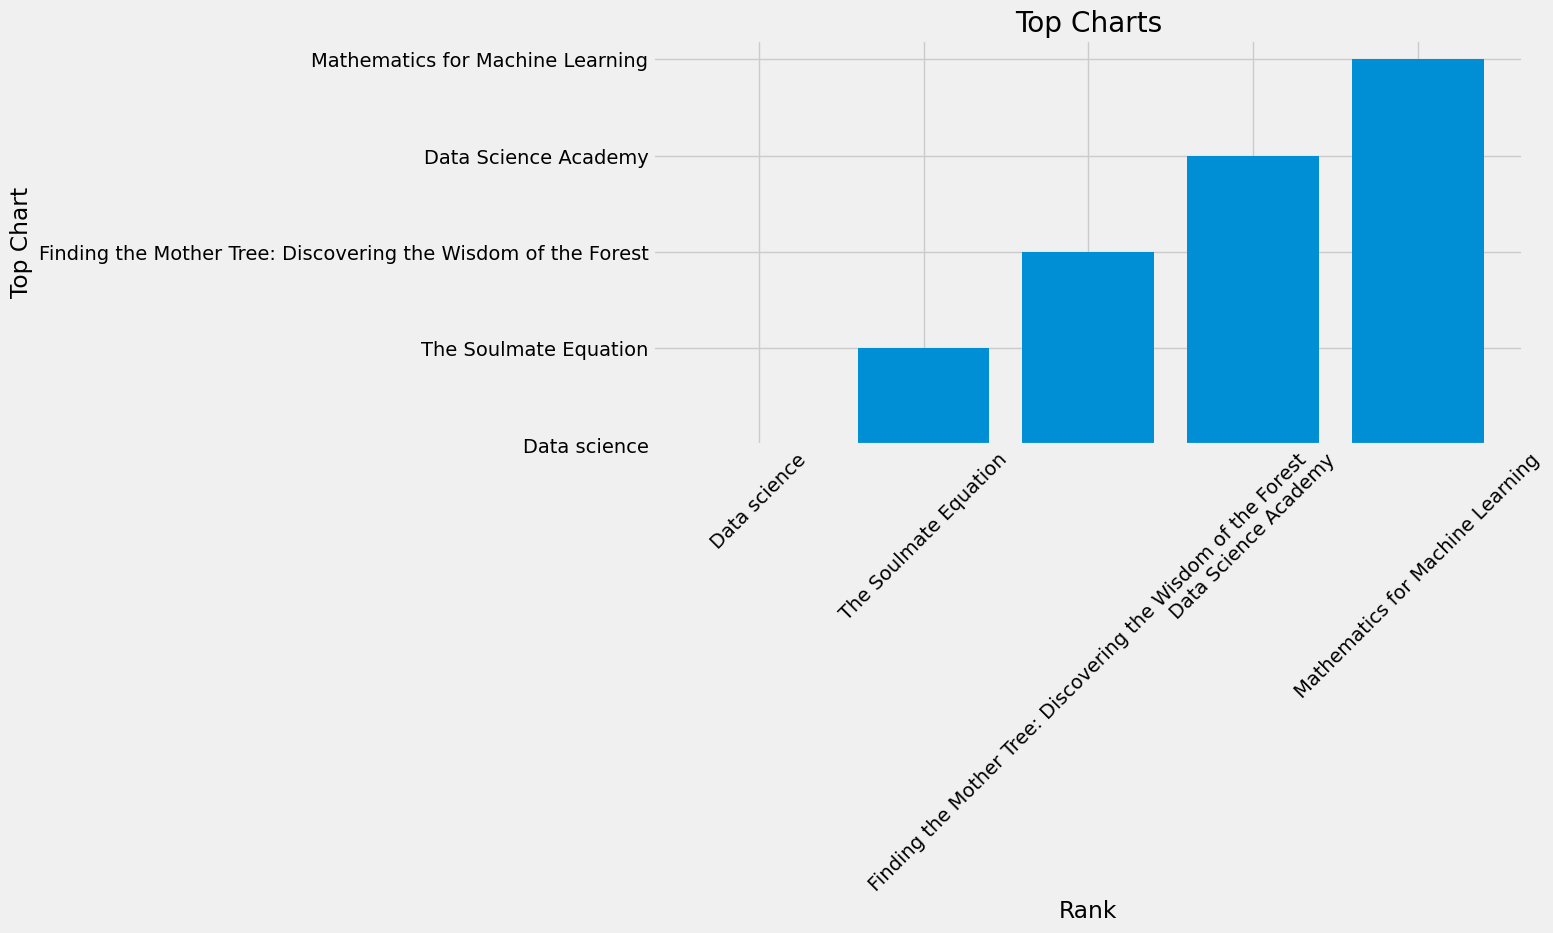

In [46]:
# Bar plot for top charts
plt.figure(figsize=(10, 5))
plt.bar(top_charts_df.index, top_charts_df['Top Chart'])
plt.xlabel('Rank')
plt.ylabel('Top Chart')
plt.title('Top Charts')
plt.xticks(top_charts_df.index, top_charts_df['Top Chart'], rotation=45)
plt.tight_layout()
plt.show()